In [26]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [27]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# !pip install pandas-datareader

In [29]:
# Test

# from data.pilot import build_pilot_dataset
# df_stocks, df_indices = build_pilot_dataset()

In [31]:
import pandas_datareader as pdr
import datetime as dt
start = dt.datetime(2014,1,1)
df = pd.read_csv(os.path.join(DATA_HOME,"set100_union.csv"))
cols = df.columns
tickers = df[cols[1]]

no_data = []

for t in tickers:
    tp = os.path.join(DATA_HOME, "historical", "%s.csv" % t)
    if os.path.exists(tp):
        #print("Data exists %s" % t)
        pass
    else:
        print("Data not exists %s" % t)
        try:
            data = pdr.get_data_yahoo('%s.BK' % t,start=start)
            outfile = tp
            data.to_csv(outfile)
        except Exception as e:
            print("Error: %s %s" % (t, str(e)))
            no_data.append(t)

Data not exists SEPPE
Error: SEPPE No data fetched for symbol SEPPE.BK using YahooDailyReader
Data not exists TUF
Error: TUF 'Date'
Data not exists LHBANK
Error: LHBANK 'Date'
Data not exists GOLD
Error: GOLD No data fetched for symbol GOLD.BK using YahooDailyReader
Data not exists HEMRAJ
Error: HEMRAJ No data fetched for symbol HEMRAJ.BK using YahooDailyReader
Data not exists BMCL
Error: BMCL 'Date'
Data not exists EARTH
Error: EARTH No data fetched for symbol EARTH.BK using YahooDailyReader
Data not exists BIGC
Error: BIGC 'Date'
Data not exists MTLS
Error: MTLS 'Date'
Data not exists ROBINS
Error: ROBINS No data fetched for symbol ROBINS.BK using YahooDailyReader
Data not exists BECL
Error: BECL 'Date'
Data not exists BGH
Error: BGH 'Date'
Data not exists GLOW
Error: GLOW No data fetched for symbol GLOW.BK using YahooDailyReader
Data not exists IFEC
Error: IFEC No data fetched for symbol IFEC.BK using YahooDailyReader
Data not exists TICON
Error: TICON 'Date'
Data not exists SIM
Err

In [32]:
no_data

['SEPPE',
 'TUF',
 'LHBANK',
 'GOLD',
 'HEMRAJ',
 'BMCL',
 'EARTH',
 'BIGC',
 'MTLS',
 'ROBINS',
 'BECL',
 'BGH',
 'GLOW',
 'IFEC',
 'TICON',
 'SIM']

In [40]:
from datetime import datetime

In [50]:

os.chdir("/home/jovyan/dataset/eikon-data")

def get_series():
    fname = 'SET_VA_2014-2020.xlsm'
    wb = xlrd.open_workbook(fname)
    series = {}
    for i in range(2,8): # Note the sheet index 2014-2019
        s = wb.sheets()[i]

        # Date index
        s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
        s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))

        for j in range(1, s.ncols):
            c = s.col(j)
            print("{}".format(c[3].value))
            name = c[3].value
            # df = pd.DataFrame()
            if not "#ERROR" in name:
                # Convert spreadsheet market cap value to python
                s2 = pd.Series(c[4:]) # observation starts at row 4
                s2 = s2.apply(lambda x: x.value)
                df = pd.concat([s1, s2], axis=1)

                if not name in series:
                    series[name] = []
                series[name].append(df)
    return series
series = get_series()

SEVEN UTILITIES AND POWER ORS - TURNOVER BY VALUE
AREEYA PROPERTY - TURNOVER BY VALUE
ASIA AVIATION - TURNOVER BY VALUE
AMATA B GRIMM PWPL.IFCF. - TURNOVER BY VALUE
ADVANCED CONNECTION CORPORATION - TURNOVER BY VALUE
ABSOLUTE CLEAN ENERGY - TURNOVER BY VALUE
AUTOCORP HOLDING - TURNOVER BY VALUE
ADVANCED INFO SER. - TURNOVER BY VALUE
AEC SECURITIES - TURNOVER BY VALUE
AE.THANA SINSAP (THAI.) - TURNOVER BY VALUE
ASIA FIBER - TURNOVER BY VALUE
AAPICO HITECH - TURNOVER BY VALUE
AIKCHOL HOSPITAL - TURNOVER BY VALUE
ASIAN INSULATORS - TURNOVER BY VALUE
AIM COML.GW.FH.&. LH. REIT UNT. - TURNOVER BY VALUE
AIM INDL.GW.FH.&. LH. REIT - TURNOVER BY VALUE
ADVANCED INFO.TECH. - TURNOVER BY VALUE
AJ PLAST - TURNOVER BY VALUE
AJ ADVANCE TECHNOLOGY ORS - TURNOVER BY VALUE
EKARAT ENGINEERING - TURNOVER BY VALUE
ALLA - TURNOVER BY VALUE
ALT TELECOM - TURNOVER BY VALUE
ALUCON - TURNOVER BY VALUE
AMANAH LEASING - TURNOVER BY VALUE
AMARIN PRINTING & PBL. - TURNOVER BY VALUE
AMATA - TURNOVER BY VALUE
AMATA 

NOBLE DEVELOPMENT - TURNOVER BY VALUE
NOK AIRLINES - TURNOVER BY VALUE
NAM SENG INSURANCE - TURNOVER BY VALUE
NONTHAVEJ HOSPITAL - TURNOVER BY VALUE
NUSASIRI - TURNOVER BY VALUE
NIRVANA DAII ORS - TURNOVER BY VALUE
NAWARAT PATANAKARN - TURNOVER BY VALUE
NAMYONG TERMINAL - TURNOVER BY VALUE
OCC - TURNOVER BY VALUE
OCEAN GLASS - TURNOVER BY VALUE
OHTL - TURNOVER BY VALUE
OISHI GROUP - TURNOVER BY VALUE
ORIGIN PROPERTY - TURNOVER BY VALUE
OSOTSPA - TURNOVER BY VALUE
PAN ASIA FOOTWEAR - TURNOVER BY VALUE
PACIFIC PIPE - TURNOVER BY VALUE
PATO CHEMICAL IND. - TURNOVER BY VALUE
PRESIDENT BAKERY - TURNOVER BY VALUE
PCS MACHINE GPHD. - TURNOVER BY VALUE
PADAENG INDUSTRY - TURNOVER BY VALUE
PRANDA JEWELRY - TURNOVER BY VALUE
PERMSIN STEEL WORKS - TURNOVER BY VALUE
PROPERTY PERFECT - TURNOVER BY VALUE
PEOPLE'S GARMENT - TURNOVER BY VALUE
PATKOL - TURNOVER BY VALUE
PHATRA LEASING - TURNOVER BY VALUE
PLAN B MEDIA - TURNOVER BY VALUE
THE PLATINUM GROUP - TURNOVER BY VALUE
POWER LINE ENGR. - TURNOVER

AGRIPURE HOLDINGS - TURNOVER BY VALUE
AQ ESTATE - TURNOVER BY VALUE
AQUA - TURNOVER BY VALUE
ASIASOFT - TURNOVER BY VALUE
SYNERGETIC AUTO PERFORMANCE - TURNOVER BY VALUE
ASEFA - TURNOVER BY VALUE
ASIA HOTEL - TURNOVER BY VALUE
ASIAN SEA CORPORATION - TURNOVER BY VALUE
ASIAN MARINE SERVICES - TURNOVER BY VALUE
ASIA SERMKIJ LEASING - TURNOVER BY VALUE
ASIA PLUS GROUP HDG. - TURNOVER BY VALUE
#ERROR
ALLIANZ AYUDHYA CAPITAL - TURNOVER BY VALUE
BUALUANG OFFE.LH. REIT. - TURNOVER BY VALUE
BEGISTICS ORS - TURNOVER BY VALUE
B-52 CAPITAL - TURNOVER BY VALUE
BANGKOK AIRWAY - TURNOVER BY VALUE
BGK.AVIATION FUEL SVS. - TURNOVER BY VALUE
#ERROR
BANPU - TURNOVER BY VALUE
HITACHI CHEMICALSTORAGE BATTERY - TURNOVER BY VALUE
BANK OF AYUDHYA - TURNOVER BY VALUE
BANGKOK BANK - TURNOVER BY VALUE
BANGKOK CHAIN HOSPITAL - TURNOVER BY VALUE
BANGCHAK CORPORATION ORS - TURNOVER BY VALUE
BCPG - TURNOVER BY VALUE
BIRLA CARBON - TURNOVER BY VALUE
BANGKOK DUSIT MED.SVS. - TURNOVER BY VALUE
BEAUTY COMMUNITY - TURNO

PATUM RICE MILL & GRNY. - TURNOVER BY VALUE
PRIME ROAD POWER - TURNOVER BY VALUE
PRINSIRI - TURNOVER BY VALUE
PRINCIPAL CAPITAL - TURNOVER BY VALUE
PRIMA MARINE - TURNOVER BY VALUE
PRUKSA HOLDING - TURNOVER BY VALUE
PRECIOUS SHIPPING - TURNOVER BY VALUE
PREMIER TECHNOLOGY - TURNOVER BY VALUE
PTG ENERGY - TURNOVER BY VALUE
POLYPLEX (THAILAND) - TURNOVER BY VALUE
PTT - TURNOVER BY VALUE
PTT EXPLORATION & PRDN. - TURNOVER BY VALUE
PTT GLOBAL CHEMICAL - TURNOVER BY VALUE
PYLON - TURNOVER BY VALUE
QUALITY CON.PRDS. - TURNOVER BY VALUE
QUALITY HOUSES - TURNOVER BY VALUE
QLT.HSE.HLRS.FH &. LH PROP - TURNOVER BY VALUE
QUALITY HOSPITALITY LEASEHOLD PROPERTY - TURNOVER BY VALUE
QUALITY HOUSES LEASEHOLD PROPERTY FU - TURNOVER BY VALUE
RAMKHAMHAENG HOSPITAL - TURNOVER BY VALUE
RATCH GROUP PCL - TURNOVER BY VALUE
#ERROR
ROYAL CERAMIC IND. - TURNOVER BY VALUE
REGIONAL CONTAINERS LIN. - TURNOVER BY VALUE
RICHY PLACE 2002 - TURNOVER BY VALUE
RAJTHANEE HOSPITAL PUBLIC - TURNOVER BY VALUE
RAIMON LAND - 

BOUTIQUE NEW CITY - TURNOVER BY VALUE
BTS GROUP HDG. - TURNOVER BY VALUE
BTS RAL.MSTI.GW. INFR. - TURNOVER BY VALUE
#ERROR
BETTER WORLD GREEN - TURNOVER BY VALUE
CARABAO GROUP - TURNOVER BY VALUE
CAL-COMP ELTN.(THAI.) - TURNOVER BY VALUE
CHONBURI CONC.PRODUCT - TURNOVER BY VALUE
CAPITAL ENGR.NETWORK - TURNOVER BY VALUE
CENTRAL PLAZA HOTEL - TURNOVER BY VALUE
SEAFRESH INDUSTRY - TURNOVER BY VALUE
COUNTRY GROUP DEV. - TURNOVER BY VALUE
COUNTRY GROUP HOLDINGS - TURNOVER BY VALUE
CHARAN INSURANCE - TURNOVER BY VALUE
CHULARAT HOSPITAL - TURNOVER BY VALUE
KGHSG.TRDG.FRZ.FOOD - TURNOVER BY VALUE
CHARN ISSARA DEVELOPMENT - TURNOVER BY VALUE
CIMB THAI BANK - TURNOVER BY VALUE
CITY STEEL - TURNOVER BY VALUE
CH KARNCHANG - TURNOVER BY VALUE
CK POWER - TURNOVER BY VALUE
CHIANGMAI FRZ.FOODS - TURNOVER BY VALUE
#ERROR
CHIANG MAI RAM MED.BUS. - TURNOVER BY VALUE
CHRISTIANI & NIELSEN - TURNOVER BY VALUE
COL - TURNOVER BY VALUE
COM7 - TURNOVER BY VALUE
#ERROR
CP ALL - TURNOVER BY VALUE
CHAROEN POKPHAND

SAHACOGEN(CHONBURI) - TURNOVER BY VALUE
SCI ELECTRIC - TURNOVER BY VALUE
SCAN INTER - TURNOVER BY VALUE
SOUTHERN CONCRETE PILE - TURNOVER BY VALUE
SAMART DIGITAL ORS - TURNOVER BY VALUE
SE-EDUCATION - TURNOVER BY VALUE
SEAFCO - TURNOVER BY VALUE
#ERROR
SENA DEVELOPMENT - TURNOVER BY VALUE
SIAM FUTURE DEVELOPMENT - TURNOVER BY VALUE
#ERROR
SIAM FOOD PRODUCTS - TURNOVER BY VALUE
SIAMGAS AND PETROCHEM. - TURNOVER BY VALUE
SHANGRI-LA HOTEL - TURNOVER BY VALUE
#ERROR
STGC.HOSPLTY. EXTENDABLE FREE&LEASE - TURNOVER BY VALUE
SIAM STEEL INTL. - TURNOVER BY VALUE
SINGER THAILAND - TURNOVER BY VALUE
SANSIRI - TURNOVER BY VALUE
SIRI PRIME OFFICE PROPERTY - TURNOVER BY VALUE
SIS DS.(THAILAND) - TURNOVER BY VALUE
#ERROR
SRITHAI SUPERWARE - TURNOVER BY VALUE
SAKOL ENERGY - TURNOVER BY VALUE
S KIJCHAI ENTERPRISE - TURNOVER BY VALUE
SIKARIN - TURNOVER BY VALUE
SALEE PRINTING - TURNOVER BY VALUE
SAHAMIT MACHINERY - TURNOVER BY VALUE
SYN MUN KONG - TURNOVER BY VALUE
SAHAMITR PRESSURE CTNR. - TURNOVER BY 

ERAWAN GROUP - TURNOVER BY VALUE
ERAWAN HOTEL GROWTH PROPERTY - TURNOVER BY VALUE
ESSO THAILAND - TURNOVER BY VALUE
EASTERN STAR REAL ESTATE - TURNOVER BY VALUE
EVERLAND - TURNOVER BY VALUE
FOOD AND DRINKS - TURNOVER BY VALUE
FANCY WOOD INDUSTRIES - TURNOVER BY VALUE
FAR EAST FAME LINE DDB ORS - TURNOVER BY VALUE
FURUKAWA METAL(THAILAND) - TURNOVER BY VALUE
FN FACTORY OUTLET - TURNOVER BY VALUE
FINANSA - TURNOVER BY VALUE
FORTH - TURNOVER BY VALUE
FRASERS PROPERTY PUBLIC - TURNOVER BY VALUE
FINANSIA SYRUS SECS. - TURNOVER BY VALUE
#ERROR
FRASERS PROP THA INDUST FHLH.REIT - TURNOVER BY VALUE
FUTURE PARK LEASEHOLD PROPERTY - TURNOVER BY VALUE
#ERROR
GLOBLEX HOLDING - TURNOVER BY VALUE
GLOBAL CONNECTIONS - TURNOVER BY VALUE
GENERAL ENGINEERING - TURNOVER BY VALUE
GENERAL ENV.CVT. - TURNOVER BY VALUE
GFPT - TURNOVER BY VALUE
#ERROR
GRATITUDE INFINITE - TURNOVER BY VALUE
G J STEEL - TURNOVER BY VALUE
GROUP LEASE - TURNOVER BY VALUE
GRAND CANAL LAND - TURNOVER BY VALUE
SIAM GLOBAL HOUSE - TU

THAI AIRWAYS INTL. - TURNOVER BY VALUE
RATCHTHANI LEASING - TURNOVER BY VALUE
THAICOM - TURNOVER BY VALUE
STEEL - TURNOVER BY VALUE
#ERROR
THANTAWAN INDUSTRY - TURNOVER BY VALUE
THAI REINSURANCE - TURNOVER BY VALUE
THAIRE LIFE ASSURANCE - TURNOVER BY VALUE
THAI INDUSTRIAL 1 - TURNOVER BY VALUE
DHIPAYA INSURANCE - TURNOVER BY VALUE
TIPCO FOODS - TURNOVER BY VALUE
TISCO FINANCIAL GROUP - TURNOVER BY VALUE
THAILAND IRON WORKS - TURNOVER BY VALUE
THITIKORN - TURNOVER BY VALUE
TAOKAENOI FOOD & MKTG. - TURNOVER BY VALUE
TKS TECHNOLOGIES - TURNOVER BY VALUE
T KRUNGTHAI INDUSTRIES - TURNOVER BY VALUE
TESCO LOTUS RET.GW. FH. &.LH. - TURNOVER BY VALUE
THAILAND HOSPITALITY PROPERTY - TURNOVER BY VALUE
TMB BANK - TURNOVER BY VALUE
THAI METAL DRUM - TURNOVER BY VALUE
TMT STEEL - TURNOVER BY VALUE
TRINITY WATTHANA - TURNOVER BY VALUE
THANULUX - TURNOVER BY VALUE
THAI NAM PLASTICS - TURNOVER BY VALUE
TRINITY FHLH.PR.FUND - TURNOVER BY VALUE
THAI NIPPON RUBBER INDUSTRY - TURNOVER BY VALUE
#ERROR
THAI 

KING WAI GROUP - TURNOVER BY VALUE
KANG YONG ELECTRIC - TURNOVER BY VALUE
LIGHTING & EQUIPMENT - TURNOVER BY VALUE
LALIN PROPERTY - TURNOVER BY VALUE
LANNA RESOURCES - TURNOVER BY VALUE
LEE FEED MILL - TURNOVER BY VALUE
LAND AND HOUSES - TURNOVER BY VALUE
LH FINANCIAL GP. - TURNOVER BY VALUE
LH HTL.LH.REIT.TST. UTS. - TURNOVER BY VALUE
LOHAKIT METAL - TURNOVER BY VALUE
LD.&.HSES.FH.AND LH.PR. - TURNOVER BY VALUE
LH SHOPPING CENTERS LEASEHOLD REIT - TURNOVER BY VALUE
LOXLEY - TURNOVER BY VALUE
LADPRAO GENERAL HOSPITAL - TURNOVER BY VALUE
LPN DEVELOPMENT - TURNOVER BY VALUE
LAGUNA RESORTS & HOTELS - TURNOVER BY VALUE
LAM SOON - TURNOVER BY VALUE
LUXURY REAL ESTATE INVESTMENT - TURNOVER BY VALUE
MAHACHAI HOSPITAL - TURNOVER BY VALUE
MFC IINV.PR.&.LH. - TURNOVER BY VALUE
MFC PATONG HERITAGE PROPERTY - TURNOVER BY VALUE
MFC-STRATEGIC STORAGE - TURNOVER BY VALUE
MK RESTAURANT GROUP - TURNOVER BY VALUE
MASTER AD - TURNOVER BY VALUE
MAJOR CINEPLEX GROUP - TURNOVER BY VALUE
SIAM MAKRO - TURNOVE

THAI WAH - TURNOVER BY VALUE
TWZ - TURNOVER BY VALUE
TYCOONS WORLDWIDE GROUP - TURNOVER BY VALUE
U CITY - TURNOVER BY VALUE
UAC GLOBAL PUBLIC COMPANY LIMITED - TURNOVER BY VALUE
UNION MOSAIC - TURNOVER BY VALUE
UNIQUE ENGR.AND CON. - TURNOVER BY VALUE
UOB KAY HIAN SECURITIES - TURNOVER BY VALUE
UNION PLASTIC - TURNOVER BY VALUE
UNION PIONEER FABRIC - TURNOVER BY VALUE
UNITED PALM OIL IND. - TURNOVER BY VALUE
URBANA PROPERTY (LEASE HOLD) - TURNOVER BY VALUE
UNION TEXTILE INDUSTRIES - TURNOVER BY VALUE
UNITED PAPER - TURNOVER BY VALUE
UNIVENTURES - TURNOVER BY VALUE
UNIVANICH PALM OIL - TURNOVER BY VALUE
VAROPAKORN - TURNOVER BY VALUE
VGI - TURNOVER BY VALUE
VIBHAVADI MEDICAL - TURNOVER BY VALUE
SRIVICHAI VEJVIVAT - TURNOVER BY VALUE
VANACHAI GROUP - TURNOVER BY VALUE
VINYTHAI - TURNOVER BY VALUE
VICHITBHAN PALMOIL - TURNOVER BY VALUE
#ERROR
WOW FACTOR - TURNOVER BY VALUE
THAI WACOAL - TURNOVER BY VALUE
WAVE ENTERTAINMENT - TURNOVER BY VALUE
WHITE GROUP - TURNOVER BY VALUE
WHA - TURNOVER

OCEAN GLASS - TURNOVER BY VALUE
OHTL - TURNOVER BY VALUE
OISHI GROUP - TURNOVER BY VALUE
#ERROR
#ERROR
PAN ASIA FOOTWEAR - TURNOVER BY VALUE
PACIFIC PIPE - TURNOVER BY VALUE
PATO CHEMICAL IND. - TURNOVER BY VALUE
PRESIDENT BAKERY - TURNOVER BY VALUE
PCS MACHINE GPHD. - TURNOVER BY VALUE
PADAENG INDUSTRY - TURNOVER BY VALUE
PRANDA JEWELRY - TURNOVER BY VALUE
PERMSIN STEEL WORKS - TURNOVER BY VALUE
PROPERTY PERFECT - TURNOVER BY VALUE
PEOPLE'S GARMENT - TURNOVER BY VALUE
#ERROR
PHATRA LEASING - TURNOVER BY VALUE
#ERROR
#ERROR
POWER LINE ENGR. - TURNOVER BY VALUE
PREMIER MARKETING - TURNOVER BY VALUE
#ERROR
PRI.OFFE.LH.PPF. REIT - TURNOVER BY VALUE
#ERROR
BANGKOK POST ORS - TURNOVER BY VALUE
PINTHONG INDUSTRIAL PARK PROPERTY - TURNOVER BY VALUE
PREMIER PRODUCTS - TURNOVER BY VALUE
PP PRIME - TURNOVER BY VALUE
#ERROR
PRAKIT HOLDINGS - TURNOVER BY VALUE
PRE-BUILT - TURNOVER BY VALUE
PREECHA GROUP - TURNOVER BY VALUE
PATUM RICE MILL & GRNY. - TURNOVER BY VALUE
PRIME ROAD POWER - TURNOVER BY 

In [55]:
lookup = pd.read_csv('lookup-stock.csv')

def rekey(sin):
    sout = {}
    keys = series.keys()
    for k in keys:
        newkey = k.replace(' - TURNOVER BY VALUE','')
        symbol = lookup.loc[lookup['name']==newkey].symbol.values[0]
        sout[symbol] = series[k]
    return sout

def rekey_and_stack(sin):
    sout = {}
    keys = series.keys()
    # Change key
    for k in keys:
        newkey = k.replace(' - TURNOVER BY VALUE','')
        symbol = lookup.loc[lookup['name']==newkey].symbol.values[0]
        sout[symbol] = series[k]
    # Merge years
    for s in sout.keys():   
        stock = pd.concat(sout[s], axis=0)
        stock.columns = ['Date', 'VA']
        stock = stock.set_index('Date') # Set date index
        sout[s] = stock 
    return sout

series2 = rekey_and_stack(series)

# pd.concat(series2['7UP'], axis=0)
series2

{'7UP':                  VA
 Date               
 2019-01-01       NA
 2019-01-02    217.2
 2019-01-03    412.3
 2019-01-04   2974.2
 2019-01-07   4037.9
 ...             ...
 2014-12-25  20139.5
 2014-12-26  38899.6
 2014-12-29  29306.8
 2014-12-30   6423.7
 2014-12-31       NA
 
 [1566 rows x 1 columns], 'A':                VA
 Date             
 2019-01-01     NA
 2019-01-02  199.5
 2019-01-03    133
 2019-01-04   99.3
 2019-01-07  119.2
 ...           ...
 2014-12-25  132.9
 2014-12-26   54.5
 2014-12-29   71.9
 2014-12-30   81.8
 2014-12-31     NA
 
 [1566 rows x 1 columns], 'AAV':                  VA
 Date               
 2019-01-01       NA
 2019-01-02  37363.6
 2019-01-03  82412.4
 2019-01-04  75351.8
 2019-01-07  30869.7
 ...             ...
 2014-12-25   105279
 2014-12-26   147574
 2014-12-29   296742
 2014-12-30   140091
 2014-12-31       NA
 
 [1566 rows x 1 columns], 'ABPIF':                 VA
 Date              
 2019-01-01      NA
 2019-01-02   445.8
 2019-01-03  1137.

In [62]:
for t in tickers:
    if t in series2.keys():
        # print("ok")
        pass
    else:
        print("No data for %s" % t)

No data for SEPPE
No data for TUF
No data for LHBANK
No data for HEMRAJ
No data for BMCL
No data for PS
No data for EARTH
No data for BIGC
No data for MTLS
No data for ROBINS
No data for BECL
No data for BGH
No data for GLOW
No data for IFEC
No data for TICON
No data for SIM


# Price Data



In [77]:
def price_value(x):
    if x.value == 'NA':
        return None
    else:
        return float(x.value)


def get_price_series():
    fname = 'SET_Price_2014-2020.xlsm'
    wb = xlrd.open_workbook(fname)
    series = {}
    for i in range(2,8): # Note the sheet index 2014-2019
        s = wb.sheets()[i]

        # Date index
        s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
        s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))

        for j in range(1, s.ncols):
            c = s.col(j)
            print("{}".format(c[3].value))
            name = c[3].value
            # df = pd.DataFrame()
            if not "#ERROR" in name:
                # Convert spreadsheet value to python
                s2 = pd.Series(c[4:]) # observation starts at row 4
                s2 = s2.apply(price_value)
                df = pd.concat([s1, s2], axis=1)

                if not name in series:
                    series[name] = []
                series[name].append(df)
    return series
series = get_price_series()

SEVEN UTILITIES AND POWER ORS
AREEYA PROPERTY
ASIA AVIATION
AMATA B GRIMM PWPL.IFCF.
ADVANCED CONNECTION CORPORATION
ABSOLUTE CLEAN ENERGY
AUTOCORP HOLDING
ADVANCED INFO SER.
AEC SECURITIES
AE.THANA SINSAP (THAI.)
ASIA FIBER
AAPICO HITECH
AIKCHOL HOSPITAL
ASIAN INSULATORS
AIM COML.GW.FH.&. LH. REIT UNT.
AIM INDL.GW.FH.&. LH. REIT
ADVANCED INFO.TECH.
AJ PLAST
AJ ADVANCE TECHNOLOGY ORS
EKARAT ENGINEERING
ALLA
ALT TELECOM
ALUCON
AMANAH LEASING
AMARIN PRINTING & PBL.
AMATA
AMATA NVDR
AMATA VN
ASIA METAL
ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
SYNERGETIC AUTO PERFORMANCE
ASEFA
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
ASSET WORLD
ALLIANZ AYUDHYA CAPITAL
BUALUANG OFFE.LH. REIT.
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
BANGKOK COMMERCIAL ASSET MANAGEMENT
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA


AIKCHOL HOSPITAL
ASIAN INSULATORS
#ERROR
AIM INDL.GW.FH.&. LH. REIT
ADVANCED INFO.TECH.
AJ PLAST
AJ ADVANCE TECHNOLOGY ORS
EKARAT ENGINEERING
ALLA
ALT TELECOM
ALUCON
AMANAH LEASING
AMARIN PRINTING & PBL.
AMATA
AMATA NVDR
AMATA VN
ASIA METAL
ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
SYNERGETIC AUTO PERFORMANCE
ASEFA
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
#ERROR
ALLIANZ AYUDHYA CAPITAL
BUALUANG OFFE.LH. REIT.
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
#ERROR
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA
BANGKOK BANK
BANGKOK CHAIN HOSPITAL
BANGCHAK CORPORATION ORS
BCPG
BIRLA CARBON
BANGKOK DUSIT MED.SVS.
BEAUTY COMMUNITY
BEC WORLD
BANGKOK EXPRESSWAY AND METRO
SRISAWAD FINANCE
BG CONTAINER GLASS PUBLIC
B GRIMM POWER
BUMRUNGRAD HOSPITAL
BIG CAMERA
BERLI JUCKER
BJC HEAVY INDUSTRIES
BANGKOK DEC-CON
#E

THAI-GERMAN PRODUCTS
TONG HUA HOLDING
THAI AIRWAYS INTL.
RATCHTHANI LEASING
THAICOM
STEEL
THONBURI HEALTHCARE GROUP
THANTAWAN INDUSTRY
THAI REINSURANCE
THAIRE LIFE ASSURANCE
THAI INDUSTRIAL 1
DHIPAYA INSURANCE
TIPCO FOODS
TISCO FINANCIAL GROUP
THAILAND IRON WORKS
THITIKORN
TAOKAENOI FOOD & MKTG.
TKS TECHNOLOGIES
T KRUNGTHAI INDUSTRIES
TESCO LOTUS RET.GW. FH. &.LH.
THAILAND HOSPITALITY PROPERTY
TMB BANK
THAI METAL DRUM
TMT STEEL
TRINITY WATTHANA
THANULUX
THAI NAM PLASTICS
TRINITY FHLH.PR.FUND
THAI NIPPON RUBBER INDUSTRY
TOA PAINT THAILAND
THAI OPTICAL GROUP
THAI OIL
THAI OPP
THAI POLY ACRYLIC
TPBI
TEXTILE PRESTIGE
TPI POLENE
TPI POLENE POWER
THAI POLYCONS
THAI PACK.AND PRINT.
THAI.PRI.PR.FHLH. REIT
TQM CORPORATION
THAI RAYON
TRC CONSTRUCTION
TRITON HOLDING
THAI RUNG UNION CAR
THAI RUBBER LATEX GROUP
TRUE CORPORATION
THAI STEEL CABLE
THAI SOLAR ENERGY
THAI SETAKIJ IN.
THIENSURAT
THAI SUGAR TERMINAL
TATA STEEL (THAILAND)
THORESEN THAI AG.
TTCL
THAI TEXTILE
TALAAD THAI LEASEHOLD PROPERTY
#

QUALITY HOSPITALITY LEASEHOLD PROPERTY
QUALITY HOUSES LEASEHOLD PROPERTY FU
RAMKHAMHAENG HOSPITAL
RATCH GROUP PCL
#ERROR
ROYAL CERAMIC IND.
REGIONAL CONTAINERS LIN.
RICHY PLACE 2002
RAJTHANEE HOSPITAL PUBLIC
RAIMON LAND
ROCKWORTH
ROYAL ORCHID HTL.(THAI.)
ROJANA INDUSTRIAL PARK
RPCG
RATCHAPHRUEK HOSPITAL
RS
RICH SPORT
S & J INTL.ENTERPRISES
S11 GROUP
SINGHA ESTATE
SABINA
SAMCHAI STEEL INDS.
SAMART
SAMMAKORN
SAMART TELCOMS
SAPPE
SOMBOON ADVANCE TECH.
THAITHEPAROS
SRISAWAD CORPORATION
SAWANG EXPORT
SAMUI BURI PROPERTY FUND
SC ASSET
SIAM COMMERCIAL BANK
SIAM CEMENT
SIAM CITY CEMENT
SAHACOGEN(CHONBURI)
SCI ELECTRIC
SCAN INTER
SOUTHERN CONCRETE PILE
SAMART DIGITAL ORS
SE-EDUCATION
SEAFCO
#ERROR
SENA DEVELOPMENT
SIAM FUTURE DEVELOPMENT
#ERROR
SIAM FOOD PRODUCTS
SIAMGAS AND PETROCHEM.
SHANGRI-LA HOTEL
#ERROR
STGC.HOSPLTY. EXTENDABLE FREE&LEASE
SIAM STEEL INTL.
SINGER THAILAND
SANSIRI
SIRI PRIME OFFICE PROPERTY
SIS DS.(THAILAND)
#ERROR
SRITHAI SUPERWARE
SAKOL ENERGY
S KIJCHAI ENTERPRISE
SIKARIN

MBK
MAYBANK KIM ENG SECS. (THAILAND)
MC GROUP
MCOT
MCS STEEL
MDX
MEGA LIFESCIENCES
MURAMOTO ELECTRON
MFC ASSET MANAGEMENT
MFEC
MIDA ASSETS
MILLCON STEEL
MINOR INTERNATIONAL
MILLIONAIRE PROPERTY
MFC INDL.REIT.TST. UTS.
MAJOR DEVELOPMENT
MJR.CPX.LFY.LH.PR.
MK REAL ESTATE DEV.
MIDA LEASING
NICHADA THANI PROPERTY 2
MFC-NICHADA THANI PROPERTY
MULTI-NATIONAL RESIDENCE
MODERNFORM GROUP
MONO TECHNOLOGY
M PICTURES ENTERTAINMENT
METRO SYSTEMS
MUANGTHAI CAPITAL ORS
MUANG THAI INSURANCE
NEW CITY (BANGKOK)
NC HOUSING
NEP REALTY & IND.
#ERROR
WATTANA KARNPAET
NEX POINT
NFC
NAVAKIJ INSURANCE
NAVANAKORN
NOBLE DEVELOPMENT
NOK AIRLINES
NAM SENG INSURANCE
NONTHAVEJ HOSPITAL
NUSASIRI
NIRVANA DAII ORS
NAWARAT PATANAKARN
NAMYONG TERMINAL
OCC
OCEAN GLASS
OHTL
OISHI GROUP
ORIGIN PROPERTY
#ERROR
PAN ASIA FOOTWEAR
PACIFIC PIPE
PATO CHEMICAL IND.
PRESIDENT BAKERY
PCS MACHINE GPHD.
PADAENG INDUSTRY
PRANDA JEWELRY
PERMSIN STEEL WORKS
PROPERTY PERFECT
PEOPLE'S GARMENT
PATKOL
PHATRA LEASING
PLAN B MEDIA
THE PLATINUM

MURAMOTO ELECTRON
MFC ASSET MANAGEMENT
MFEC
MIDA ASSETS
MILLCON STEEL
MINOR INTERNATIONAL
MILLIONAIRE PROPERTY
MFC INDL.REIT.TST. UTS.
MAJOR DEVELOPMENT
MJR.CPX.LFY.LH.PR.
MK REAL ESTATE DEV.
MIDA LEASING
NICHADA THANI PROPERTY 2
MFC-NICHADA THANI PROPERTY
MULTI-NATIONAL RESIDENCE
MODERNFORM GROUP
MONO TECHNOLOGY
M PICTURES ENTERTAINMENT
METRO SYSTEMS
MUANGTHAI CAPITAL ORS
MUANG THAI INSURANCE
NEW CITY (BANGKOK)
NC HOUSING
NEP REALTY & IND.
#ERROR
WATTANA KARNPAET
NEX POINT
NFC
NAVAKIJ INSURANCE
NAVANAKORN
NOBLE DEVELOPMENT
NOK AIRLINES
NAM SENG INSURANCE
NONTHAVEJ HOSPITAL
NUSASIRI
NIRVANA DAII ORS
NAWARAT PATANAKARN
NAMYONG TERMINAL
OCC
OCEAN GLASS
OHTL
OISHI GROUP
ORIGIN PROPERTY
#ERROR
PAN ASIA FOOTWEAR
PACIFIC PIPE
PATO CHEMICAL IND.
PRESIDENT BAKERY
PCS MACHINE GPHD.
PADAENG INDUSTRY
PRANDA JEWELRY
PERMSIN STEEL WORKS
PROPERTY PERFECT
PEOPLE'S GARMENT
PATKOL
PHATRA LEASING
PLAN B MEDIA
THE PLATINUM GROUP
POWER LINE ENGR.
PREMIER MARKETING
PM THORESEN ASIA HDG.
PRI.OFFE.LH.PPF. RE

INTOUCH HOLDINGS
INOUE RUBBER
IRPC
IT CITY
ITALIAN-THAI DEVELOPMENT
INDORAMA VENTURES
#ERROR
JASMINE INTERNATIONAL
#ERROR
JCK INTERNATIONAL ORS
JACK CHIA INDUSTRIES
JAY MART
JMT NETWORK SERVICES
JASMINE TELECOM SYS.
JUTHA MARITIME
#ERROR
KARMARTS
KASIKORNBANK
KHONBURI SUGAR
KRUNGTHAI CAR RENT AND LEASE
KCE ELECTRONICS
THONBURI MEDICAL CENTRE
KGI SECURITIES
KULTHORN KIRBY
KIATNAKIN BANK
KPN PROPERTY
KHON KAEN SUGAR
KRUNG THAI BANK
KRUNGTHAI CARD
KASET THAI INTERNATIONAL SUG.
KRUNGDHEP SOPHON
KING WAI GROUP
KANG YONG ELECTRIC
LIGHTING & EQUIPMENT
LALIN PROPERTY
LANNA RESOURCES
LEE FEED MILL
LAND AND HOUSES
LH FINANCIAL GP.
#ERROR
LOHAKIT METAL
LD.&.HSES.FH.AND LH.PR.
LH SHOPPING CENTERS LEASEHOLD REIT
LOXLEY
#ERROR
LPN DEVELOPMENT
LAGUNA RESORTS & HOTELS
LAM SOON
LUXURY REAL ESTATE INVESTMENT
MAHACHAI HOSPITAL
MFC IINV.PR.&.LH.
MFC PATONG HERITAGE PROPERTY
MFC-STRATEGIC STORAGE
MK RESTAURANT GROUP
MASTER AD
MAJOR CINEPLEX GROUP
SIAM MAKRO
MALEE GROUP
MANDARIN HOTEL
MATCHING MAXIMIZE SLN.

In [78]:

def rekey_and_stack(sin):
    sout = {}
    keys = series.keys()
    # Change key
    for k in keys:
        # newkey = k.replace(' - TURNOVER BY VALUE','')
        symbol = lookup.loc[lookup['name']==k].symbol.values[0]
        sout[symbol] = series[k]
    # Merge years
    for s in sout.keys():   
        stock = pd.concat(sout[s], axis=0)
        stock.columns = ['Date', 'Price']
        stock = stock.set_index('Date') # Set date index
        sout[s] = stock 
    return sout

price_series = rekey_and_stack(series)
price_series['7UP']

,Price
Date,
2019-01-01,0.44
2019-01-02,0.43
2019-01-03,0.43
2019-01-04,0.43
2019-01-07,0.42
...,...
2014-12-25,3.22
2014-12-26,3.24
2014-12-29,3.05


,Price
Date,


In [ ]:

dataset.keys()

dataset['SET50'][['Close']].plot(title='SET50', rot=90)
dataset['SCB'][['Close']].plot(title='SCB', rot=90)


In [8]:
# Extract period from historical/
from dataset import Yr2014, Yr2020, Yr2019
from data.src import stockdata_fetch_local

In [9]:

from data.src import stockdata_fetch_local


In [10]:
from data.pilot import get_pilot_stocks
df_stocks = get_pilot_stocks()

tbl = df_stocks.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])
tbl

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2015-01-05      220.0  179.0          31.500000  59.50                27.25   
2015-01-06      214.0  175.0          32.299999  58.75                26.50   
2015-01-07      218.0  178.0          33.400002  59.00                26.75   
2015-01-08      228.0  182.0          34.000000  59.50                26.75   
2015-01-09      229.0  184.5          33.799999  59.00                27.00   
...               ...    ...                ...    ...                  ...   
2019-12-24      148.0  118.5          44.250000  69.00                27.75   
2019-12-25      151.0  119.5          44.250000  69.50                27.75   
2019-12-26      150.0  119.0          44.500000  69.00                27.75   
2019-12-27      150.0  119.5          44.250000  69.50                27.50   
2019-12-30      151.0  122.0          44.000000  68.75                27.50   

Industry               Property Development       Transportation & Logistics  \
Sector              Property & Construction                         Services   
Ticker          KSL                      AP    LH                        AOT   
Date                                                                           
2015-01-05  5.31818                    5.95  9.00                  27.299999   
2015-01-06  5.31818                    5.90  8.85                  27.200001   
2015-01-07  5.31818                    6.00  9.00                  28.299999   
2015-01-08  5.31818                    6.20  9.15                  28.900000   
2015-01-09  5.31818                    6.20  9.10                  29.100000   
...             ...                     ...   ...                        ...   
2019-12-24  2.18000                    6.90  9.70                  73.250000   
2019-12-25  2.16000                    7.00  9.75                  74.000000   
2019-12-26  2.18000                    7.35  9.70                  74.750000   
2019-12-27  2.18000                    7.35  9.75                  74.250000   
2019-12-30  2.24000                    7.45  9.80                  74.250000   

Industry           
Sector             
Ticker        BTS  
Date               
2015-01-05   9.55  
2015-01-06   9.85  
2015-01-07   9.90  
2015-01-08   9.95  
2015-01-09   9.95  
...           ...  
2019-12-24  13.10  
2019-12-25  13.20  
2019-12-26  13.20  
2019-12-27  13.20  
2019-12-30  13.20  

[1219 rows x 10 columns]

Text(0.5, 1.0, 'Pilot Data Set: Stocks')

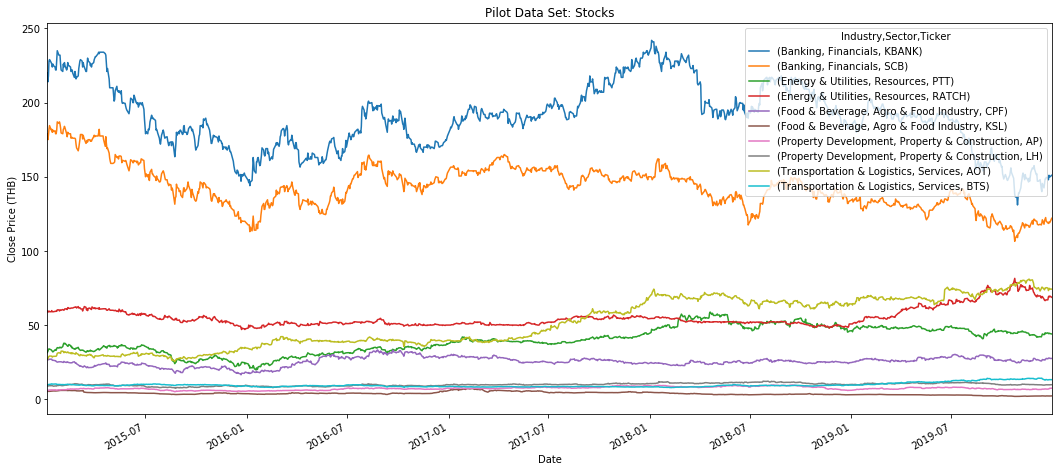

In [11]:
tbl.plot(figsize=(18,8))
plt.ylabel('Close Price (THB)')
plt.title("Pilot Data Set: Stocks")

# Get Indices Data

In [12]:
from data.src import indexdata_fetch_local, read_csv_from_historical_folder

In [13]:
indices = ["SET","SET50","SET100"]
df_indices = indexdata_fetch_local(Yr2014.dt_end, Yr2019.dt_end, ["SET","SET50","SET100"])
df_indices

,Price,Open,High,Low,Vol.,Change %,Close,Volume,Date,Ticker
0,"1,483.25",1499.70,1502.10,1482.87,7.13B,-0.96,1483.25,7.130000e+09,2015-01-05,SET
1,"1,477.58",1467.97,1478.35,1459.22,31.34B,-0.38,1477.58,3.134000e+10,2015-01-06,SET
2,"1,500.75",1478.84,1500.83,1478.26,12.40B,1.57,1500.75,1.240000e+10,2015-01-07,SET
3,"1,521.62",1514.90,1523.32,1514.18,18.00B,1.39,1521.62,1.800000e+10,2015-01-08,SET
4,"1,529.42",1529.50,1531.21,1522.75,32.28B,0.51,1529.42,3.228000e+10,2015-01-09,SET
...,...,...,...,...,...,...,...,...,...,...
3655,"2,331.24",2342.41,2345.18,2328.64,1.59B,-0.39,2331.24,1.590000e+09,2019-12-24,SET100
3656,"2,337.13",2326.72,2340.71,2323.98,909.04M,0.25,2337.13,9.090400e+08,2019-12-25,SET100
3657,"2,344.83",2338.75,2347.20,2336.55,1.27B,0.33,2344.83,1.270000e+09,2019-12-26,SET100
3658,"2,342.05",2353.21,2360.24,2323.01,1.49B,-0.12,2342.05,1.490000e+09,2019-12-27,SET100


In [14]:
df_indices[df_indices['Ticker']=='SET50']

,Price,Open,High,Low,Vol.,Change %,Close,Volume,Date,Ticker
1220,987.40,1002.19,1003.83,986.94,674.13M,-1.36,987.40,6.741300e+08,2015-01-05,SET50
1221,980.50,974.75,981.66,967.74,1.05B,-0.70,980.50,1.050000e+09,2015-01-06,SET50
1222,998.05,980.88,998.10,980.18,784.32M,1.79,998.05,7.843200e+08,2015-01-07,SET50
1223,"1,013.24",1009.68,1015.52,1008.11,1.07B,1.52,1013.24,1.070000e+09,2015-01-08,SET50
1224,"1,017.87",1018.89,1019.91,1013.03,813.37M,0.46,1017.87,8.133700e+08,2015-01-09,SET50
...,...,...,...,...,...,...,...,...,...,...
2435,"1,065.23",1070.38,1071.83,1063.74,1.27B,-0.40,1065.23,1.270000e+09,2019-12-24,SET50
2436,"1,067.99",1062.79,1069.60,1061.32,591.91M,0.26,1067.99,5.919100e+08,2019-12-25,SET50
2437,"1,070.74",1068.57,1071.84,1066.53,752.04M,0.26,1070.74,7.520400e+08,2019-12-26,SET50
2438,"1,068.72",1074.67,1077.51,1059.21,1.03B,-0.19,1068.72,1.030000e+09,2019-12-27,SET50


In [15]:
# indices['SET50'] = df_indices[df_indices['Ticker']=='SET50']
# indices['SET100'] = df_indices[df_indices['Ticker']=='SET100']
#  indices['SET'].index = pd.to_datetime(indices['SET']['Date'])
# indices['SET']

In [16]:
symbols = indices
df = pd.DataFrame()
indices = {}
for i in symbols:
    indices[i] = df_indices[df_indices['Ticker']==i]
    indices[i].index = pd.to_datetime(indices[i]['Date'])
    df = pd.concat([df, indices[i]])

# indices

In [17]:
""" From 10-stock_QP.ipynb
df = pd.DataFrame()
dataset = {}
for s in stocks:
    try:
        data = pdr.get_data_yahoo('%s.BK' % s,start=start,end=end)
        data['ticker'] = s # add ticker to column
        data['adj_close'] = data['Adj Close']
        dataset[s] = data[['ticker', 'adj_close']] # Need two columns
        df = pd.concat([df, dataset[s]])
    except Exception as e:
        print("Error: %s %s" % (s, str(e)))
"""

table = df.pivot(columns='Ticker')['Price'] # Pivot table
table

Ticker,SET,SET100,SET50
Date,,,
2015-01-05,"1,483.25","2,184.80",987.40
2015-01-06,"1,477.58","2,172.92",980.50
2015-01-07,"1,500.75","2,211.95",998.05
2015-01-08,"1,521.62","2,246.20","1,013.24"
2015-01-09,"1,529.42","2,256.59","1,017.87"
...,...,...,...
2019-12-24,"1,568.63","2,331.24","1,065.23"
2019-12-25,"1,573.00","2,337.13","1,067.99"
2019-12-26,"1,579.03","2,344.83","1,070.74"


Text(0.5, 1.0, 'Pilot Data Set: Stock Indices')

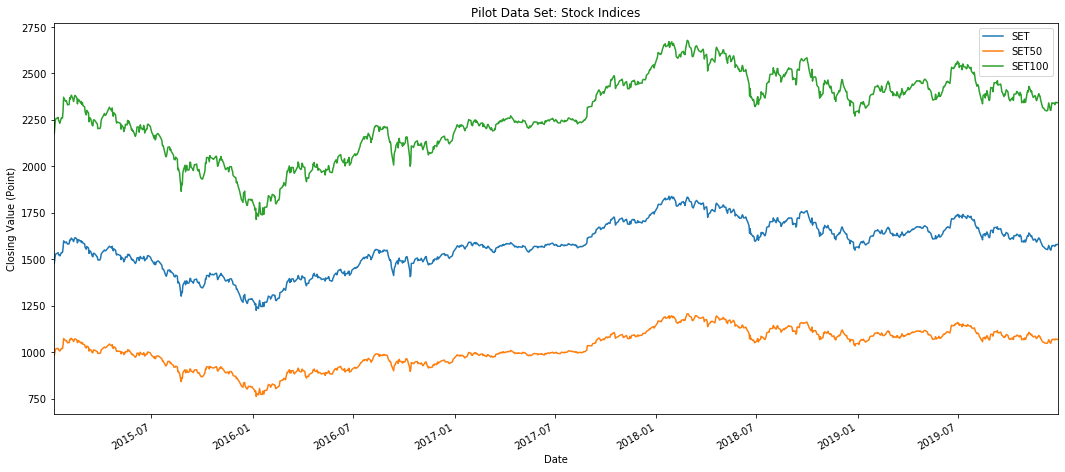

In [18]:
fig, ax = plt.subplots()
for si in indices:
    a = indices[si][['Close']].plot(ax=ax, legend=False, figsize=(18, 8))
ax.legend(indices.keys())
plt.ylabel('Closing Value (Point)')
plt.title("Pilot Data Set: Stock Indices")

# Merge two Pivot tables

In [ ]:
tbl_index = df_indices.pivot_table(values='Close', index='Date', columns=['Ticker'])
tbl_index

In [ ]:
tbl_stock = df_stocks.pivot_table(values='Close', index='Date', columns=['Ticker'])
tbl_stock

# Apply frequency 'day' to both frames and see the NaN data point

In [ ]:
tbl_stock.index
tbl_stock.asfreq('d')

In [ ]:
tbl_index.asfreq('d')

# There is some missing data

The index counts for two data frames are not aligned.

In [ ]:
tbl_index.index.difference(tbl_stock.index)

### 2017-01-13

In [ ]:
tbl_stock['2017-01-12':'2017-01-14']

In [ ]:
tbl_index['2017-01-12':'2017-01-14']

### 2017-05-05

In [ ]:
tbl_stock['2017-05-04':'2017-05-06']

In [ ]:
tbl_index['2017-05-04':'2017-05-06']

In [ ]:
## 

tbl_stock.index.difference(tbl_index.index)

### 2015-05-04

In [ ]:
tbl_stock['2015-05-03':'2015-05-05']

In [ ]:
tbl_index['2015-05-03':'2015-05-05']

In [ ]:
tbl_stock.plot(figsize=(18,8))

In [ ]:
tbl_stock.columns

In [ ]:
tbl_index.columns

In [ ]:
PILOT_DATA_HOME = os.path.join(DATA_HOME, 'pilot.data')


def write_piot_series(ticker, dataframe, folder=PILOT_DATA_HOME):
    dataframe.to_csv(os.path.join(folder,'%s.csv' % ticker))
    print("Wrote: %s pilot data series with %s observations." % (ticker, len(dataframe)))
    return dataframe

# For each stock, 
# for i in symbols:
#     indices[i] = df_indices[df_indices['Ticker']==i]

os.listdir(PILOT_DATA_HOME)

tbl_stock.columns[1]

In [ ]:
for ticker in tbl_stock.columns:
    df_series = df_stocks[df_stocks['Ticker']==ticker]
    df_series.index = pd.to_datetime(df_series['Date'])
    write_piot_series(ticker, df_series)


In [ ]:
for ticker in tbl_index.columns:
    df_series = df_indices[df_indices['Ticker']==ticker]
    df_series.index = pd.to_datetime(df_series['Date'])
    write_piot_series(ticker, df_series)

In [ ]:
# Check pilot data folder
os.listdir(PILOT_DATA_HOME)

In [22]:
PILOT_DATA_HOME = os.path.join(DATA_HOME, 'pilot.data')
os.listdir(PILOT_DATA_HOME)

['AOT.csv',
 'AP.csv',
 'BTS.csv',
 'CPF.csv',
 'KBANK.csv',
 'KSL.csv',
 'LH.csv',
 'PTT.csv',
 'RATCH.csv',
 'SCB.csv',
 'SET.csv',
 'SET100.csv',
 'SET50.csv',
 'ticker.list']

# Prepare Statistics for Summary

In [23]:
ticker_list = pd.DataFrame(dataset.keys(), columns=['Ticker'])

ticker_list.to_csv(os.path.join(PILOT_DATA_HOME,'ticker.list'), header=False)

ticker_list

,Ticker
0,AOT
1,AP
2,BTS
3,CPF
4,KBANK
5,KSL
6,LH
7,PTT
8,RATCH
9,SCB


In [24]:
from data.pilot import get_pilot_indices

df_indices = get_pilot_indices()
tbl_index = df_indices.pivot_table(values='Close', index='Date', columns=['Ticker'])

tbl_index.describe().T[['count','mean','std']]

,count,mean,std
Ticker,,,
SET,1220.0,1573.443500,131.171925
SET100,1220.0,2277.210320,209.162121
SET50,1220.0,1022.889516,97.049547


In [25]:
from data.pilot import get_pilot_stocks

df_stocks = get_pilot_stocks()

pd.DataFrame(df_stocks.columns.values).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,High,Low,Open,Close,Volume,Adj Close,Date,Ticker,Sector,Industry,DailyReturn,DailyPriceVariation,PriceStDev-5d


In [26]:
tbl_stock = df_stocks.pivot_table(values='Close', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count        mean        std
Industry                   Ticker                               
Banking                    KBANK   1219.0  190.546760  22.184956
                           SCB     1219.0  143.301477  14.986309
Energy & Utilities         PTT     1219.0   39.944012   8.827818
                           RATCH   1219.0   55.308039   6.476952
Food & Beverage            CPF     1219.0   25.421165   3.093084
                           KSL     1219.0    3.914794   1.037321
Property Development       AP      1219.0    7.307096   1.036955
                           LH      1219.0    9.884413   0.962428
Transportation & Logistics AOT     1219.0   51.197457  16.544097
                           BTS     1219.0    9.579861   1.487237

In [27]:

tbl_stock = df_stocks.pivot_table(values='DailyReturn', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count      mean       std
Industry                   Ticker                            
Banking                    KBANK   1219.0  0.000342  0.014750
                           SCB     1219.0  0.000328  0.014253
Energy & Utilities         PTT     1219.0 -0.000251  0.016748
                           RATCH   1219.0 -0.000129  0.010348
Food & Beverage            CPF     1219.0 -0.000007  0.017997
                           KSL     1219.0  0.000716  0.020884
Property Development       AP      1219.0 -0.000184  0.017454
                           LH      1219.0 -0.000065  0.014488
Transportation & Logistics AOT     1219.0 -0.000794  0.013938
                           BTS     1219.0 -0.000257  0.011233

In [28]:
tbl_stock = df_stocks.pivot_table(values='DailyPriceVariation', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count      mean       std
Industry                   Ticker                            
Banking                    KBANK   1219.0  0.017773  0.008782
                           SCB     1219.0  0.017674  0.008343
Energy & Utilities         PTT     1219.0  0.019079  0.009996
                           RATCH   1219.0  0.014953  0.008475
Food & Beverage            CPF     1219.0  0.024826  0.011992
                           KSL     1219.0  0.024797  0.017568
Property Development       AP      1219.0  0.025363  0.012563
                           LH      1219.0  0.022130  0.010860
Transportation & Logistics AOT     1219.0  0.017942  0.010775
                           BTS     1219.0  0.016667  0.008154

In [29]:
tbl_stock = df_stocks.pivot_table(values='PriceStDev-5d', index='Date', columns=['Industry','Ticker'])
tbl_stock.describe().T[['count','mean','std']]

count      mean       std
Industry                   Ticker                            
Banking                    KBANK   1219.0  2.402909  1.398210
                           SCB     1219.0  1.701185  0.995610
Energy & Utilities         PTT     1219.0  0.521836  0.339826
                           RATCH   1219.0  0.465348  0.358120
Food & Beverage            CPF     1219.0  0.371629  0.226520
                           KSL     1219.0  0.067267  0.067863
Property Development       AP      1219.0  0.104064  0.057971
                           LH      1219.0  0.114355  0.066236
Transportation & Logistics AOT     1219.0  0.561897  0.395831
                           BTS     1219.0  0.086228  0.058231

In [3]:
from data.pilot import build_pilot_dataset
build_pilot_dataset()

(         High     Low    Open   Close      Volume   Adj Close       Date  \
 0      181.50  179.00  181.00  179.00   5752000.0  138.838455 2015-01-05   
 1      176.50  173.50  176.00  175.00  10430400.0  135.735931 2015-01-06   
 2      179.00  175.00  175.50  178.00   4456700.0  138.062836 2015-01-07   
 3      182.00  180.00  181.00  182.00   3963800.0  141.165359 2015-01-08   
 4      184.50  182.00  183.00  184.50   4298800.0  143.104462 2015-01-09   
 ...       ...     ...     ...     ...         ...         ...        ...   
 12185   69.75   67.00   67.25   69.00   7883900.0   67.580246 2019-12-24   
 12186   70.00   69.00   69.00   69.50   3154500.0   68.069962 2019-12-25   
 12187   69.75   68.75   69.75   69.00   2904300.0   67.580246 2019-12-26   
 12188   69.75   68.75   69.00   69.50   4584900.0   68.069962 2019-12-27   
 12189   69.50   68.25   69.50   68.75   4775700.0   67.335388 2019-12-30   
 
       Ticker      Sector            Industry  DailyReturn  \
 0        SC